Coefficients: [1.61051362e-19]
Intercept: -1.983018924045637e-20


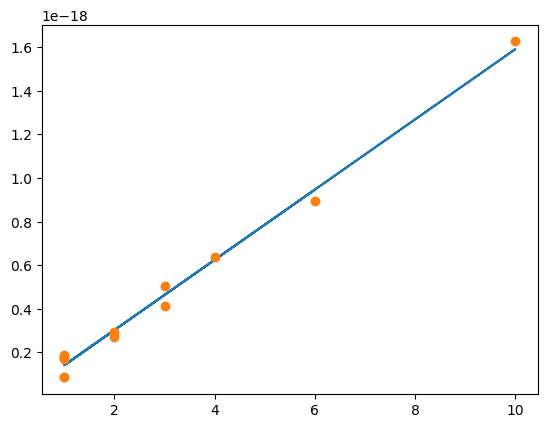

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_excel('data.xlsx')
t_g = data['t_g']
t_e = data['t_e']
U = data['U']
delta = 5e-4
K_2 = 201.4
K_1 = 5.87e-9
q_0= 1.6e-19
v_g = delta / t_g
a_star = 4.07e-8
a_0 = np.sqrt(K_1 * v_g)
a = a_0 -a_star
U_0 = (t_e / (t_g + t_e)) * U
q = K_2 * (a**3/U_0)
n = q / q_0
filtered_n = n[n < 11]
round_n = np.round(filtered_n)
filtered_q= q[n < 11]

# Create an instance of the LinearRegression model
model = LinearRegression()

# Reshape the round_n and filtered_q variables to 2D arrays
X = round_n.values.reshape(-1, 1)
y = filtered_q.values.reshape(-1, 1)

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept of the linear regression line
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)
plt.plot(round_n, coefficients * round_n + intercept)
plt.plot(round_n, filtered_q, 'o')

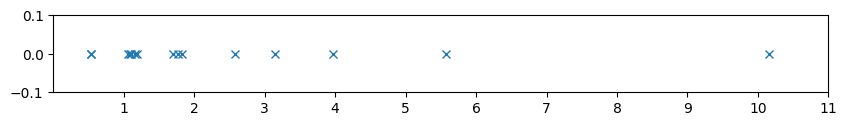

In [5]:

# Adjust the aspect ratio to 1:10
plt.figure(figsize=(10, 1))

# Plot the filtered values on the unit axis
plt.plot(filtered_n, [0] * len(filtered_n), 'x')

# Set the x-axis limits and ticks
plt.xlim(0, 11)
plt.ylim(-0.1, 0.1)
plt.xticks(range(1, 12))

# Show the plot
plt.show()
